In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
4,1200,2,51.00
0,1056,2,39.07
9,3700,5,167.00
13,1100,2,40.00
10,1800,3,82.00


In [3]:
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [4]:
X = df.drop('price', axis=1).values
Y = df.price.values.reshape(df.shape[0],1)  # ma trận (20x1)
X.shape, Y.shape

((20, 2), (20, 1))

In [5]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
Y_scaled = scalerY.fit_transform(Y)

# Batch Gradien Descent

In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    features = X.shape[1]
    samples = X.shape[0]
    
    w = np.ones(shape=(features, 1)) # matrix (2x1)
    bias = 0
    
    list_loss = []
    list_epoch = []
    
    for i in range(epochs):
        weighted_sum = (X @ w) + bias # (20x2) @ (2x1) + 1 số = (20x1)
        y_pred = weighted_sum   # no activation function
        
        loss = np.mean(np.square(y_true - y_pred))  # mean squared error
        
        if i % 5 == 0:
            list_loss.append(loss)
            list_epoch.append(i)

        d_w = (-2/samples) * (X.T @ (y_true - y_pred))  # 1 số * (2x20) @ (20x1) = (2x1)
        d_bias = (-2/samples) * np.sum(y_true - y_pred)
        
        w = w - learning_rate * d_w  # return matrix (2x1)
        bias = bias - learning_rate * d_bias
    
    return w, bias, loss, list_loss, list_epoch

In [7]:
w, bias, loss, list_loss, list_epoch = batch_gradient_descent(X_scaled, Y_scaled, 200)
loss

0.011596714354952787

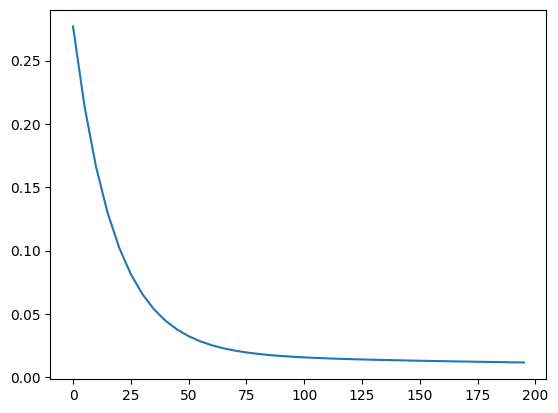

In [8]:
plt.plot(list_epoch, list_loss)  # epochs = 50 là đẹp r!!!

### Predict

In [9]:
w, bias

(array([[0.77641934],
        [0.745817  ]]),
 -0.29270697048396327)

In [10]:
def predict(X, w, bias):
    weighted_sum = X @ w + bias  # (20x2) @ (2x1) = (20x1)
    y_pred = weighted_sum
    return y_pred

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, random_state=1)

In [12]:
yp_test = predict(X_test, w, bias)

In [13]:
scalerY.inverse_transform(yp_test)

array([[ 68.88678413],
       [ 56.5617965 ],
       [137.82807848],
       [ 78.97086493],
       [ 65.95914778],
       [ 95.23551137]])

In [14]:
scalerY.inverse_transform(y_test)

array([[ 75.],
       [ 48.],
       [135.],
       [ 82.],
       [ 62.],
       [101.]])